In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [3]:
d = pd.read_csv(r"C:\Users\user\Downloads\autos.csv", encoding='latin-1')

In [4]:
d.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
d[['abtest','fuelType','model','gearbox','vehicleType','notRepairedDamage']].mode()

,abtest,fuelType,model,gearbox,vehicleType,notRepairedDamage
0,test,benzin,golf,manuell,limousine,nein


In [7]:
d[['price','yearOfRegistration','powerPS','monthOfRegistration','kilometer','nrOfPictures','postalCode']].mean()

price                   17295.141865
yearOfRegistration       2004.577997
powerPS                   115.549477
monthOfRegistration         5.734445
kilometer              125618.688228
nrOfPictures                0.000000
postalCode              50820.667640
dtype: float64

##### Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


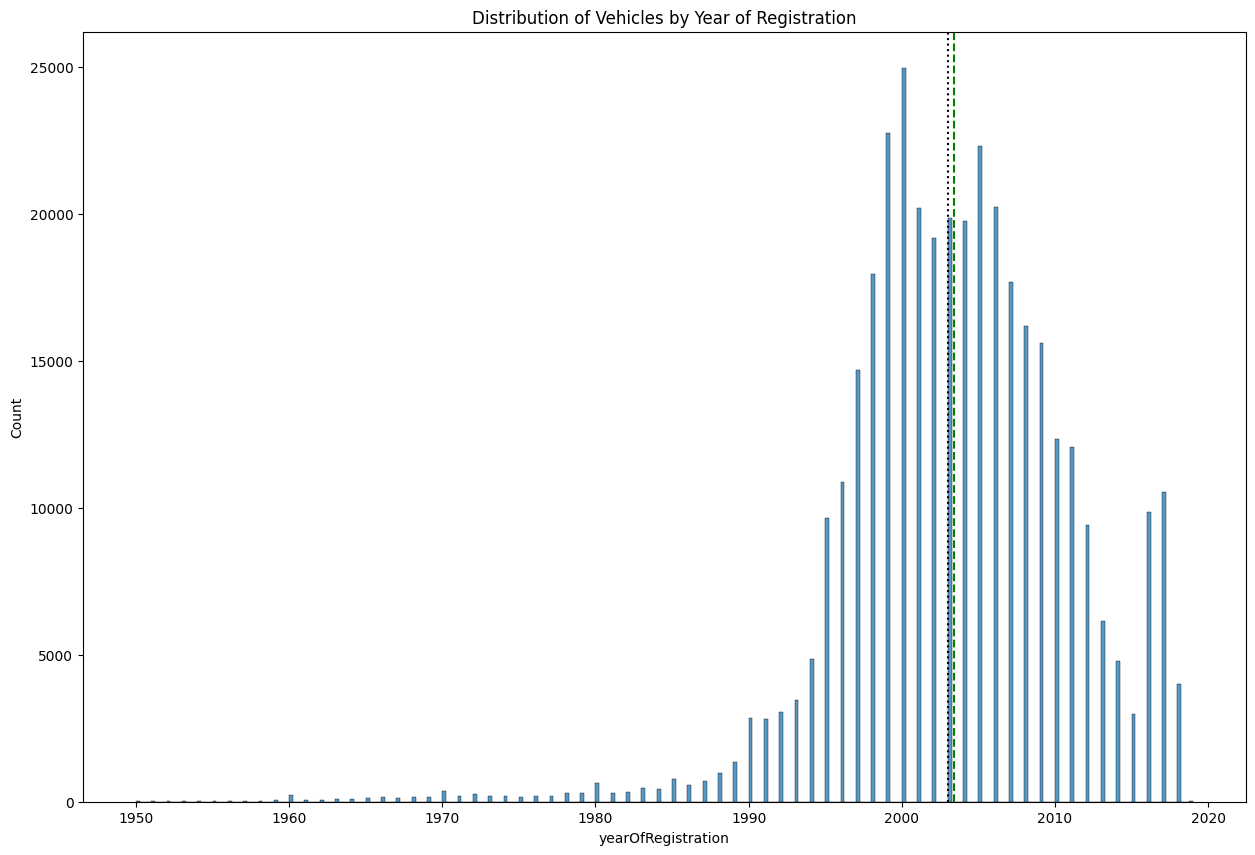

In [12]:
d["yearOfRegistration"] = d["yearOfRegistration"].where((d["yearOfRegistration"] >= 1950) & (d["yearOfRegistration"] <= 2023),d["yearOfRegistration"].mode()[0])
plt.figure(figsize=(15, 10))
sns.histplot(d, x=d["yearOfRegistration"])
plt.axvline(d['yearOfRegistration'].mean(),color='g',linestyle='--')
plt.axvline(d['yearOfRegistration'].median(),color='k',linestyle=':')
plt.title("Distribution of Vehicles by Year of Registration")
plt.show()

##### Create a plot based on the Variation of the price range by the vehicle type

C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


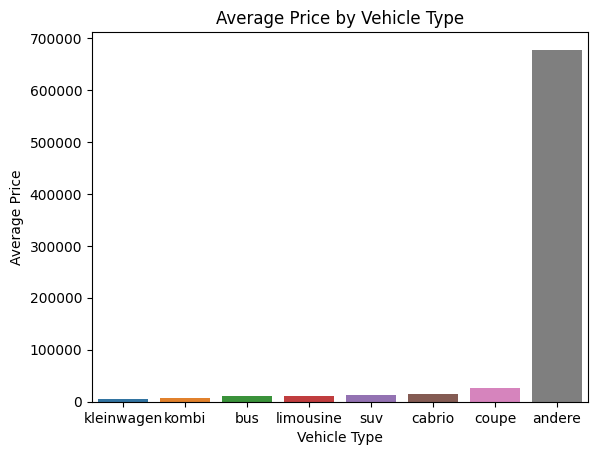

In [13]:
average_prices_by_type=d.groupby('vehicleType')['price'].mean()
average_prices_by_type=average_prices_by_type.sort_values()
sns.barplot(x=average_prices_by_type.index, y=average_prices_by_type.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Type')
plt.show()

##### Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


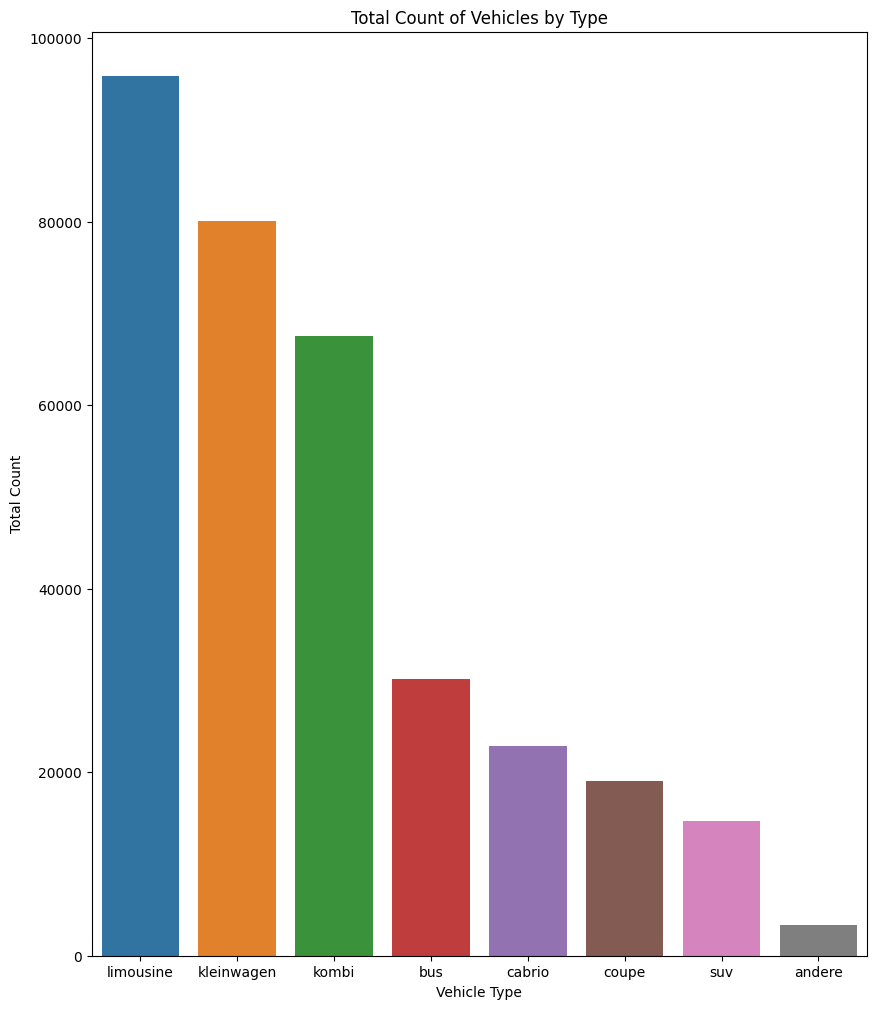

In [14]:
vehicle_count_by_type=d['vehicleType'].value_counts()
plt.figure(figsize=(10,12))
sns.barplot(x=vehicle_count_by_type.index, y=vehicle_count_by_type.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Count')
plt.title('Total Count of Vehicles by Type')
plt.show()

##### Is there any relationship between dollar_price and kilometer?

In [15]:
df[['price','kilometer']].corr(method='spearman')

,price,kilometer
price,1.000000,-0.373047
kilometer,-0.373047,1.000000


C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\New folder\envs\Datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


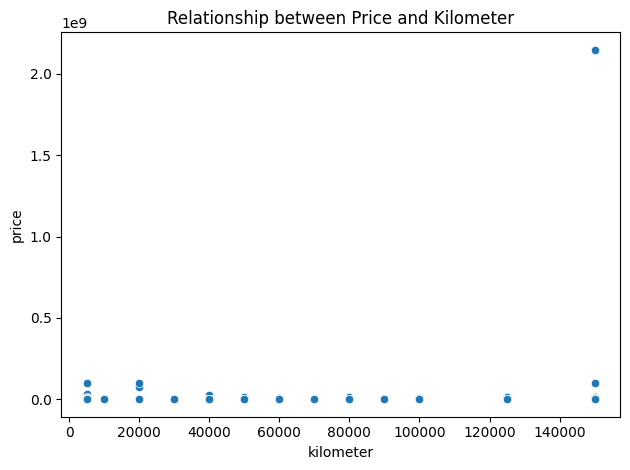

In [16]:
sns.scatterplot(data=d, x='kilometer', y='price')
plt.title('Relationship between Price and Kilometer')
plt.tight_layout()
plt.show()
